# Demonstration of Automatic Data Processing *without MOSEK*

## Clean data set example

7/7/21

This notebook demonstrates the newly added support for open-source solvers. This feature is currently for testing and R&D purposes only, and the authors make no claims as to the stability or speed of the open-source solvers.

### Notebook setup and library imports

In [1]:
import numpy as np

# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 5.3 seconds       



In [3]:
data_frame.head()

,SiteID,ac_current,ac_power,ac_voltage,ambient_temp,dc_current,dc_power,dc_voltage,inverter_error_code,inverter_temp,module_temp,poa_irradiance,power_factor,relative_humidity,wind_direction,wind_speed
2011-01-01 00:00:00,34.0,0.0,-200.0,284.0,-3.353332,0.0,-200.0,16.0,0.0,37.0,-7.105555,0.0,0.0,53.513,315.270,0.483250
2011-01-01 00:15:00,34.0,0.0,-300.0,284.0,-3.381110,0.0,-200.0,16.0,0.0,36.0,-6.944444,0.0,0.0,53.581,308.835,0.698724
2011-01-01 00:30:00,34.0,0.0,-300.0,284.0,-3.257777,0.0,-200.0,16.0,0.0,36.0,-6.344444,0.0,0.0,53.413,272.678,0.218156
2011-01-01 00:45:00,34.0,0.0,-200.0,283.0,-3.296666,0.0,0.0,15.0,0.0,36.0,-6.655555,0.0,0.0,52.406,55.913,0.159146
2011-01-01 01:00:00,34.0,0.0,-300.0,284.0,-3.426110,0.0,-200.0,14.0,0.0,35.0,-7.405555,0.0,0.0,53.588,152.145,0.240508


### Running the `DataHandler` processing pipeline

In [4]:
dh = DataHandler(data_frame)

In [5]:
dh.run_pipeline(power_col="ac_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list:   0%|                                          | 0/7 [00:00<?, ?it/s]/Users/bennetm/miniconda3/envs/pvi-user-pip/lib/python3.12/site-packages/solardatatools/time_axis_manipulation.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if avg_day[0] >= thresh:
/Users/bennetm/miniconda3/envs/pvi-user-pip/lib/python3.12/site-packages/solardatatools/time_axis_manipulation.py:152: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if avg_day[-1] >= thresh:
/Users/bennetm/miniconda3/envs/pvi-user-pip/lib/python3.12/site-packages/solardatatools/matrix_embedding.py:41: FutureWarning: Second.delta is deprecated and will 



total time: 9.31 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.14s
Cleaning                   0.23s
Filtering/Summarizing      4.94s
    Data quality           0.13s
    Clear day detect       0.28s
    Clipping detect        2.69s
    Capacity change detect 1.84s



### Top-level reporting

First we view a quick summary of the data set. 

In [6]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


We use heat maps to view the entire data set at once. This provides a much clearer picture of system performance and data set quality than trying to view the time series signal over multiple years.

The "raw" matrix is the initial embedding of the data table after infering the correct shape (number of data points per day by the number of full days) and standardizing the time axis. The white spaces are missing data.

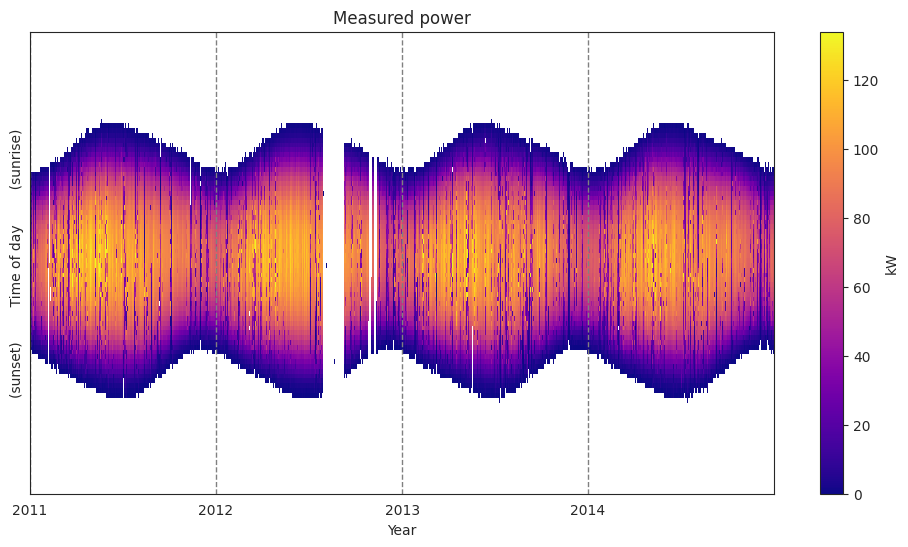

In [7]:
dh.plot_heatmap(matrix="raw");

The "filled" matrix is a formal matrix $M\in\mathbf{R}^{m\times n}$. All entries are real-valued. Night time values and missing days are filled with zeros. Gap within days are filled with linear interpolation.

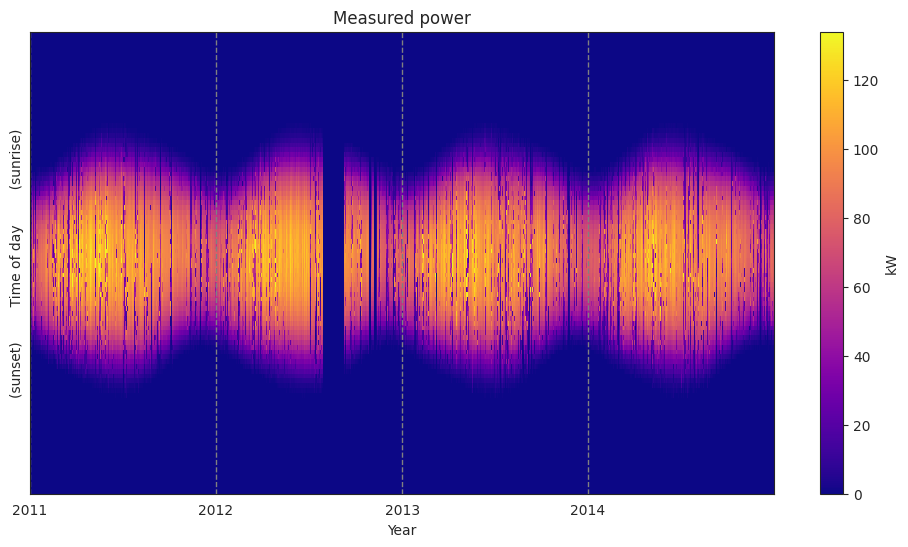

In [8]:
dh.plot_heatmap(matrix="filled", scale_to_kw=True);

### Access to data

Data is available in a number of formats. The first is the original tabular data used at class instantiation.

In [9]:
type(dh.data_frame)

pandas.core.frame.DataFrame

In [10]:
dh.data_frame.columns

Index(['SiteID', 'ac_current', 'ac_power', 'ac_voltage', 'ambient_temp',
       'dc_current', 'dc_power', 'dc_voltage', 'inverter_error_code',
       'inverter_temp', 'module_temp', 'poa_irradiance', 'power_factor',
       'relative_humidity', 'wind_direction', 'wind_speed', 'seq_index'],
      dtype='object')

In [11]:
dh.data_frame["ac_power"].max()

134000.0

In [12]:
dh.data_frame["ac_power"].min()

-1300.0

The second is the "raw" data matrix. This is a 2D `numpy.array` object created from the tabular data. Some entries may be missing if there was not a measurement reported for that timestamp in the data table.

In [13]:
dh.raw_data_matrix.shape

(96, 1461)

In [14]:
np.max(dh.raw_data_matrix)

nan

In [15]:
np.min(dh.raw_data_matrix)

nan

Finally, we have the "filled" data matrix. This 2D `numpy.array` has a real float value in every entry.

In [16]:
dh.filled_data_matrix.shape

(96, 1461)

In [17]:
np.max(dh.filled_data_matrix)

134000.0

In [18]:
np.min(dh.filled_data_matrix)

0.0

### Daywise filtering and selection

After running the pipeline, the class has an attribute which holds a number of boolian indices, each of a length equal to the number of days in the data set. The available flags to filter on are shown below.

In [19]:
dh.daily_flags.__dict__.keys()

dict_keys(['density', 'linearity', 'no_errors', 'clear', 'cloudy', 'inverter_clipped', 'capacity_cluster'])

In [20]:
dh.daily_flags.no_errors

array([ True,  True,  True, ...,  True,  True,  True])

### Seasonal analysis using circular statistics

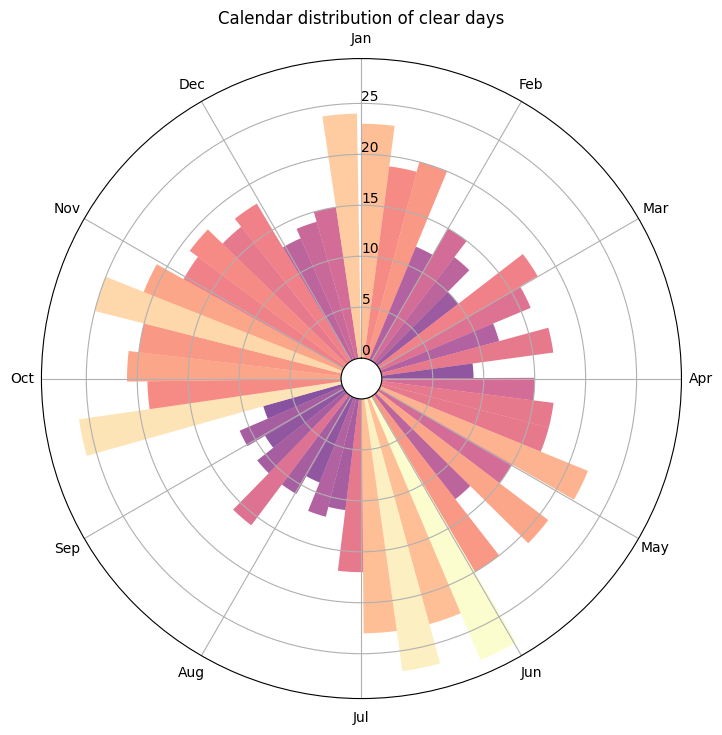

In [21]:
dh.plot_circ_dist(flag="clear");

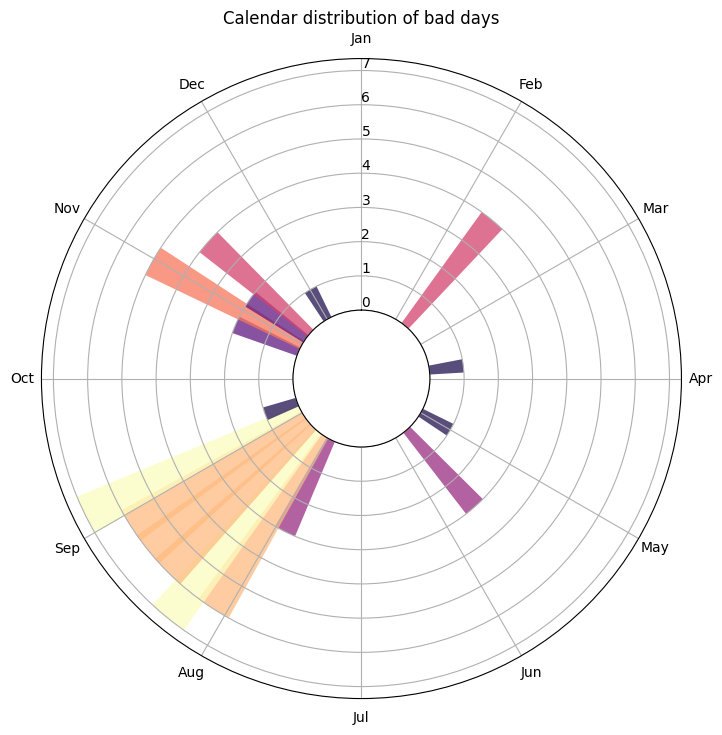

In [22]:
dh.plot_circ_dist(flag="bad");

### Views into the behavior of the algorithms

_Data quality flagging_

#### Clear Days

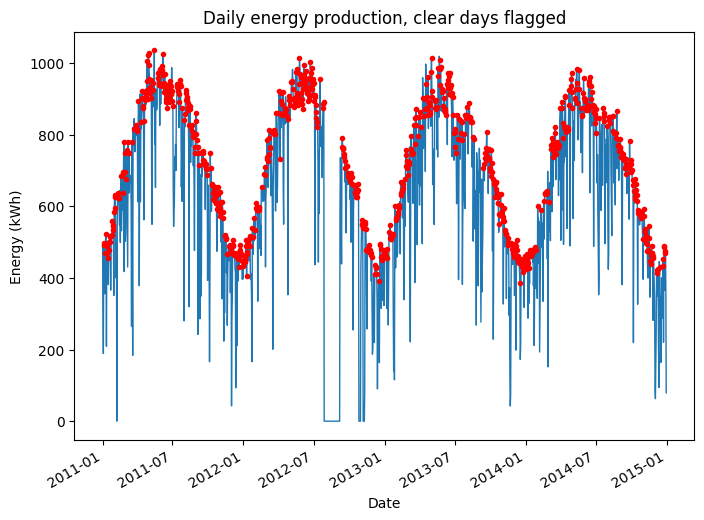

In [23]:
dh.plot_daily_energy(flag="clear");

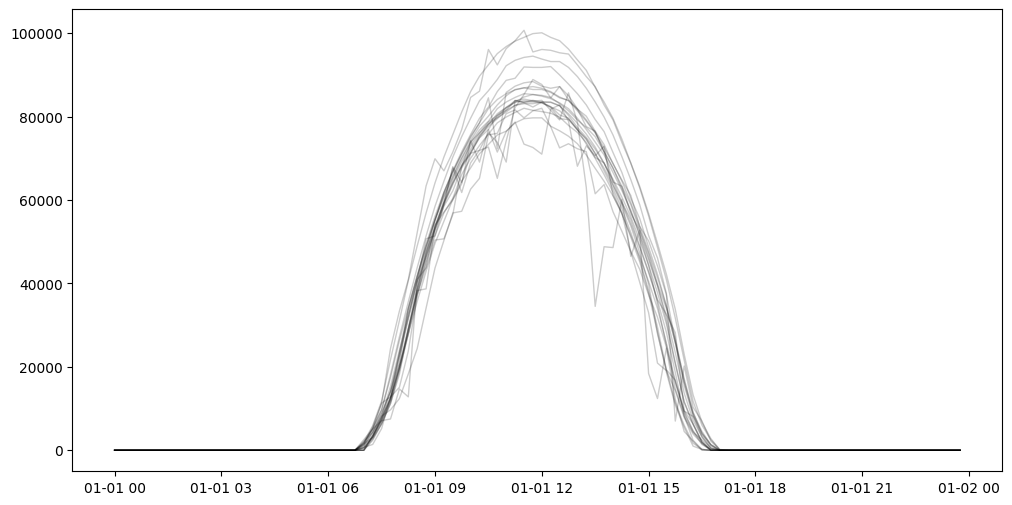

In [24]:
bix = dh.daily_flags.clear
dh.plot_daily_signals(
    boolean_index=bix, start_day=0, num_days=20, ravel=False, color="black", alpha=0.2
);

#### Missing/corrupted data

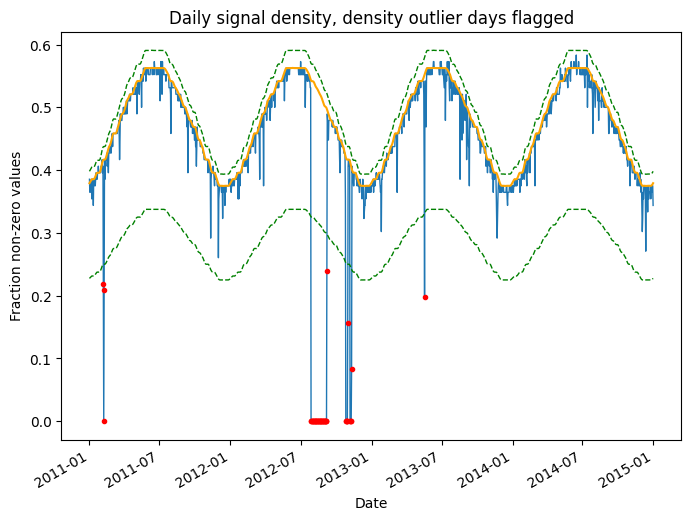

In [25]:
dh.plot_density_signal(show_fit=True, flag="density");

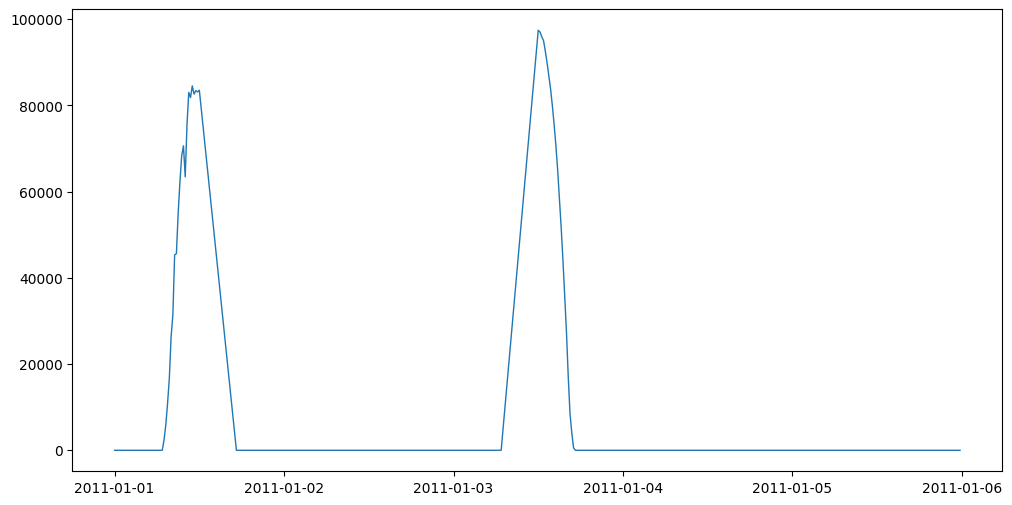

In [26]:
# Select days that failed the density test
bix = ~dh.daily_flags.density
dh.plot_daily_signals(boolean_index=bix, start_day=0, num_days=5, ravel=True);

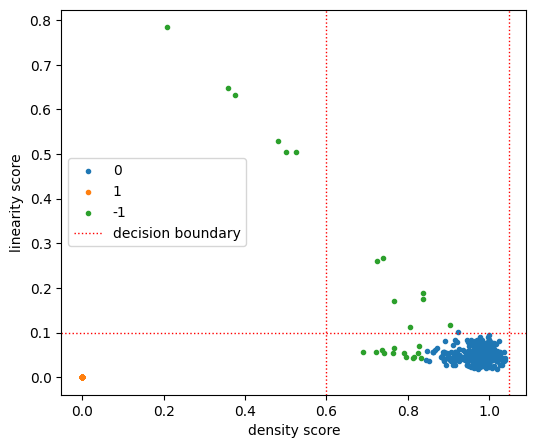

In [27]:
dh.plot_data_quality_scatter();

### Capacity change analysis

This analysis checks for abrupt step changes in the apparent capacity of the system.

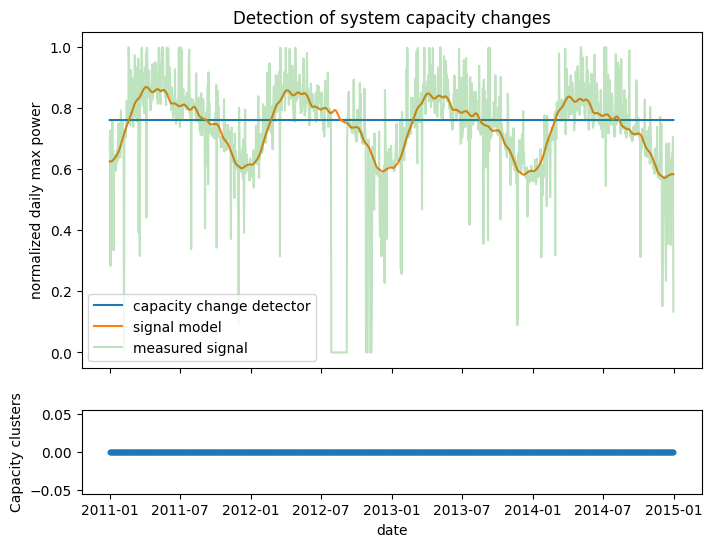

In [28]:
dh.plot_capacity_change_analysis();

### Clipping analysis

These plots show how clipped days are detected (none in this data set).

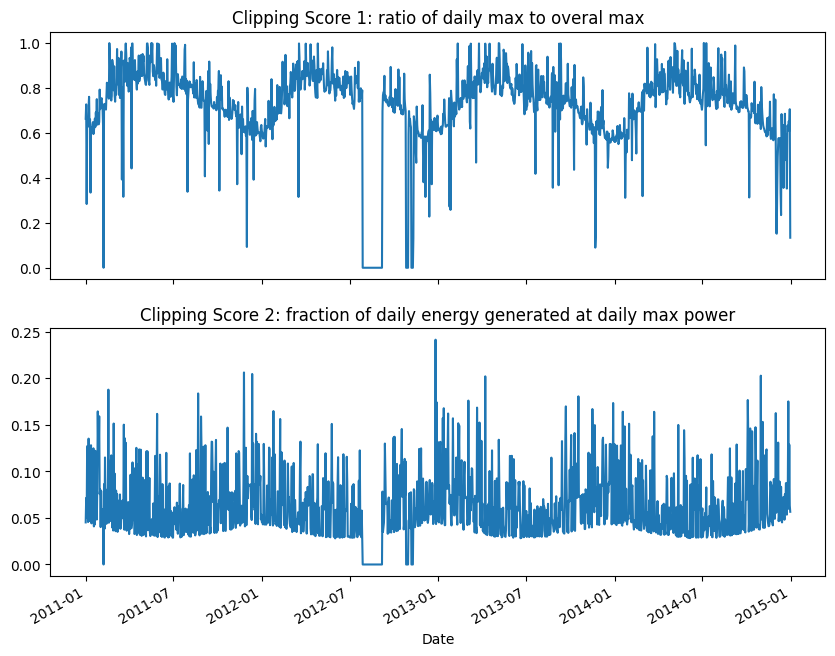

In [29]:
dh.plot_clipping();

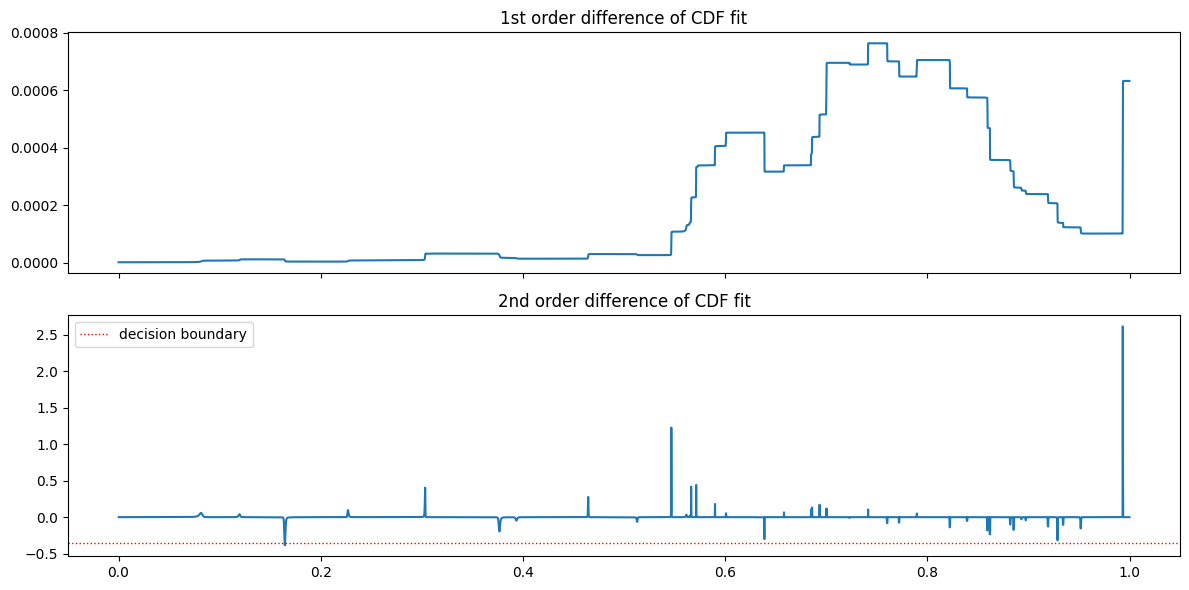

In [30]:
dh.plot_cdf_analysis();